In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('/Users/mayank/Desktop/house-price-prediction/data/raw/train.csv')
test = pd.read_csv('/Users/mayank/Desktop/house-price-prediction/data/raw/test.csv')

train.shape

(1460, 81)

In [28]:
print(train['SalePrice'].head(10))

0    208500
1    181500
2    223500
3    140000
4    250000
5    143000
6    307000
7    200000
8    129900
9    118000
Name: SalePrice, dtype: int64


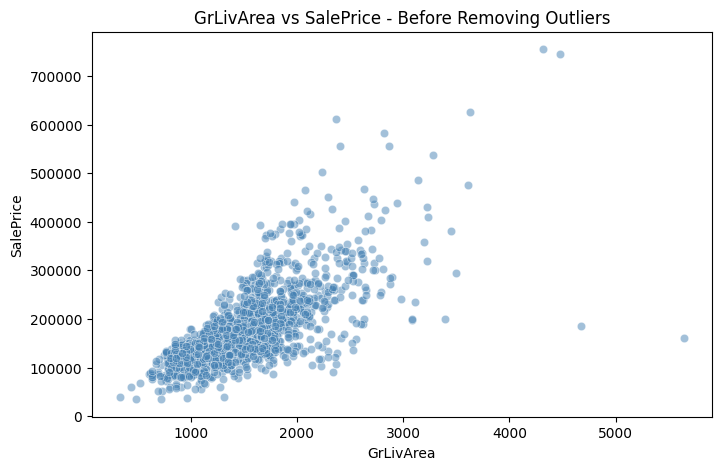

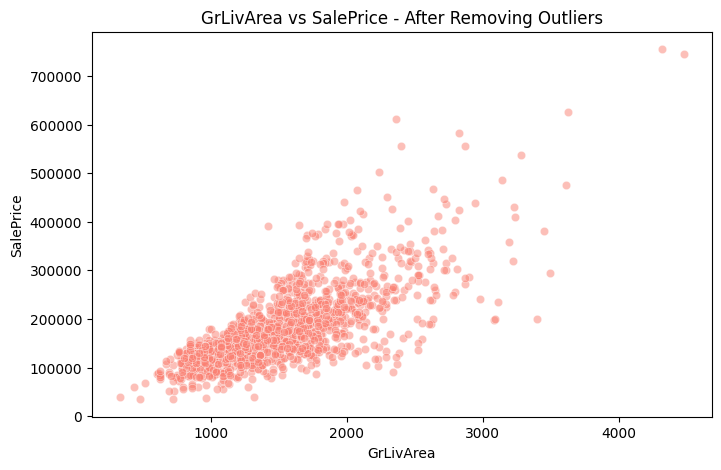

Train shape after removing outliers: (1458, 81)


In [29]:
# Visulisation before removing outlier

plt.figure(figsize=(8,5))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'], color='steelblue', alpha=0.5)
plt.title('GrLivArea vs SalePrice - Before Removing Outliers')
plt.show

#Removing outliers

train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)

#Visulisation after outlier removed
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'], alpha=0.5, color='salmon')
plt.title('GrLivArea vs SalePrice - After Removing Outliers')
plt.show()

print("Train shape after removing outliers:", train.shape)

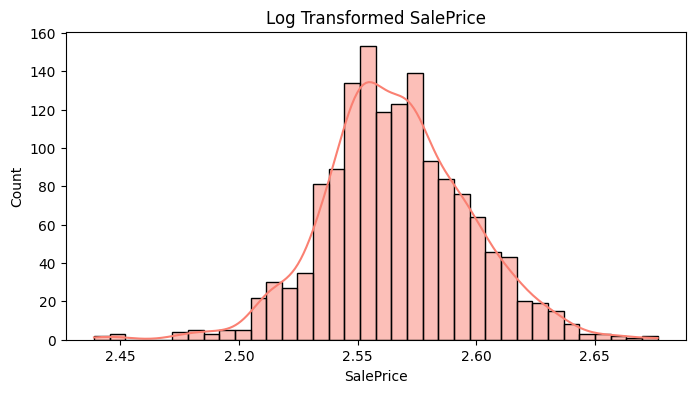

SalePrice mean: 2.5663246683992864
SalePrice min: 2.4388863376283574
SalePrice max: 2.6765233691142827


In [35]:
train['SalePrice'] = np.log1p(train['SalePrice'])

plt.figure(figsize=(8,4))
sns.histplot(train['SalePrice'], kde=True, color='salmon')
plt.title('Log Transformed SalePrice')
plt.show()

print("SalePrice mean:", train['SalePrice'].mean())
print("SalePrice min:", train['SalePrice'].min())
print("SalePrice max:", train['SalePrice'].max())

In [43]:
cat_cols = train.select_dtypes(include='object').columns
num_cols = train.select_dtypes(include = ['int64', 'float64']).columns

print('Categories Colmuns:', len(cat_cols))
print('Numeric Colmuns:', len(num_cols))

Categories Colmuns: 43
Numeric Colmuns: 38


In [46]:
cat_none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                 'BsmtFinType2', 'MasVnrType']

for col in cat_none_cols:
    train[col] = train[col].fillna('None')
    test[col] = test[col].fillna('None')
    
print("Done filling categorical missing values with None")

print(train[cat_none_cols].isnull().sum())

Done filling categorical missing values with None
PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
MasVnrType      0
dtype: int64
